In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pip install openpyxl

In [2]:
pip install jedi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_excel("Superstore_USA.xlsx")


In [4]:
data

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530


In [5]:
data.shape

(9426, 24)

In [6]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
#Filling the missing Value
data["Product Base Margin"].fillna(data["Product Base Margin"].mean(),inplace = True)

C:\Users\lavis\AppData\Local\Temp\ipykernel_10900\1571098375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Product Base Margin"].fillna(data["Product Base Margin"].mean(),inplace = True)


## Order Priority

In [8]:
data["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [9]:
#Find the unique values
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
#Replaceing "Critical " to "Critical"

data["Order Priority"] = data["Order Priority"].replace("Critical ", "Critical")

In [11]:
#checking again
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

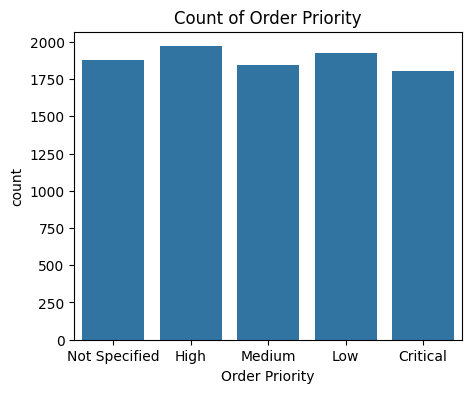

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Order Priority", data = data)
plt.title ("Count of Order Priority")
plt.savefig("Count of Order Priority")
plt.show()

## Ship Mode

###### Univariate Analysis /// Single Column

In [13]:
data["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

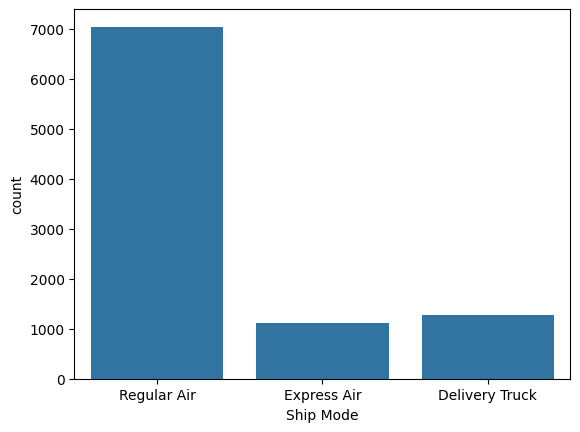

In [14]:
sns.countplot(x = "Ship Mode", data = data)

In [15]:
# Seprating values and indexing

x = data["Ship Mode"].value_counts().index

In [16]:
x

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [17]:
y = data["Ship Mode"].value_counts().values

In [18]:
y

array([7036, 1283, 1107])

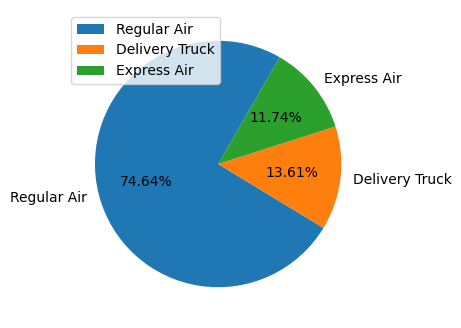

In [19]:
#ploting a pie chart

plt.figure(figsize = (5,4))
plt.pie(y, labels = x , startangle= 60, autopct= "%0.2f%%")
plt.legend(loc=2)

From tha above pie chart we can say that most of products are ship Through Regular Air

## Ship Mode & Product Category

##### Bivariate Analysis /// Two Column

Text(0.5, 1.0, 'Ship Mode Throught Product Categories')

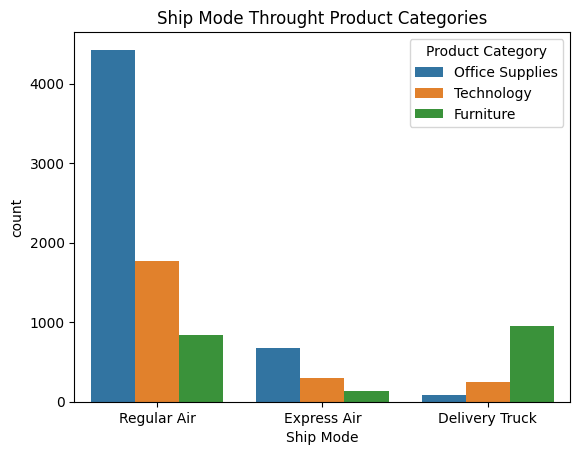

In [20]:
#Countplot to showing the ship mode, categorized by product category.

sns.countplot(x = "Ship Mode", data = data, hue = "Product Category")
plt.title("Ship Mode Throught Product Categories")

# Product Category

In [21]:
data["Product Category"].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

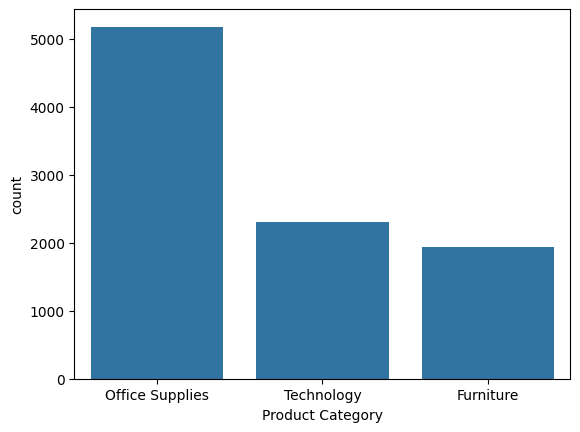

In [22]:
sns.countplot(x = "Product Category", data = data)
plt.show()

From above chart we can say that Office Supplies has the highest sales

# Product Category & Profit


<Axes: xlabel='Product Category', ylabel='Profit'>

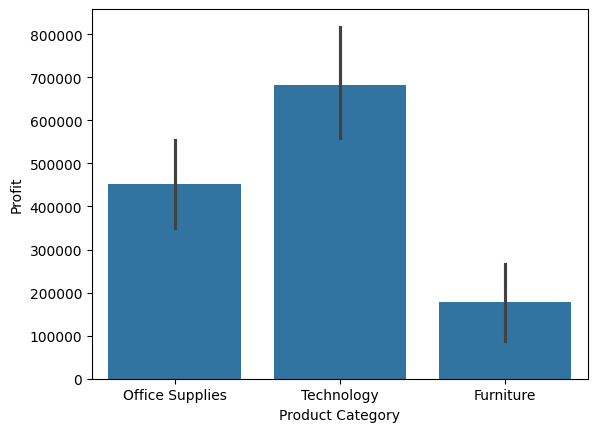

In [23]:
sns.barplot(x = "Product Category", y = "Profit", data = data, estimator="sum")

From above chart we can say that company is generating highest profit from Technology products Categoryies

# Product Base Margin


<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

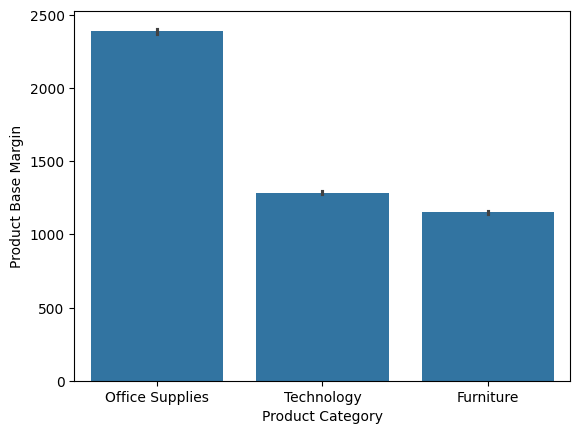

In [24]:
sns.barplot(x = "Product Category", y = "Product Base Margin", data = data, estimator="sum")

From above chart we can say that Higest margin are comes from office supplies

# Product Container


<Axes: xlabel='Product Container', ylabel='count'>

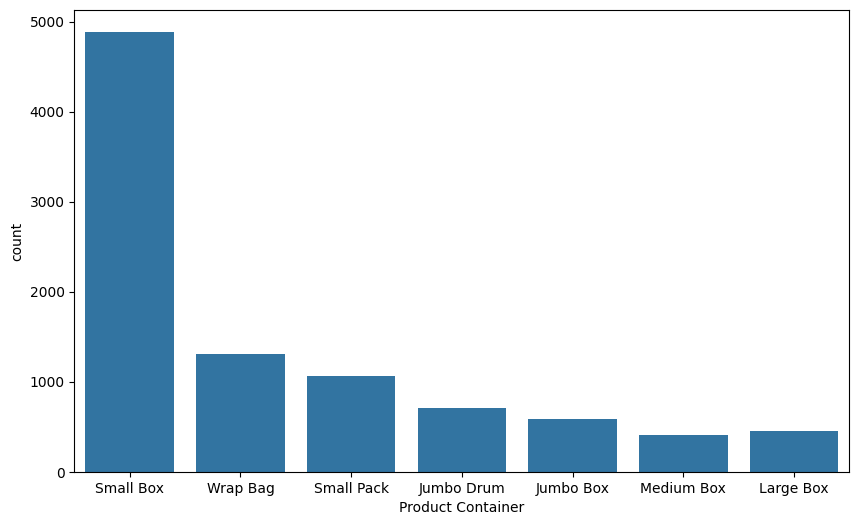

In [25]:
plt.figure(figsize = (10,6))
sns.countplot( x= "Product Container", data = data)


From above chart we can say that small box are used maximum for shipping

# Product Category and Product Sub-Category

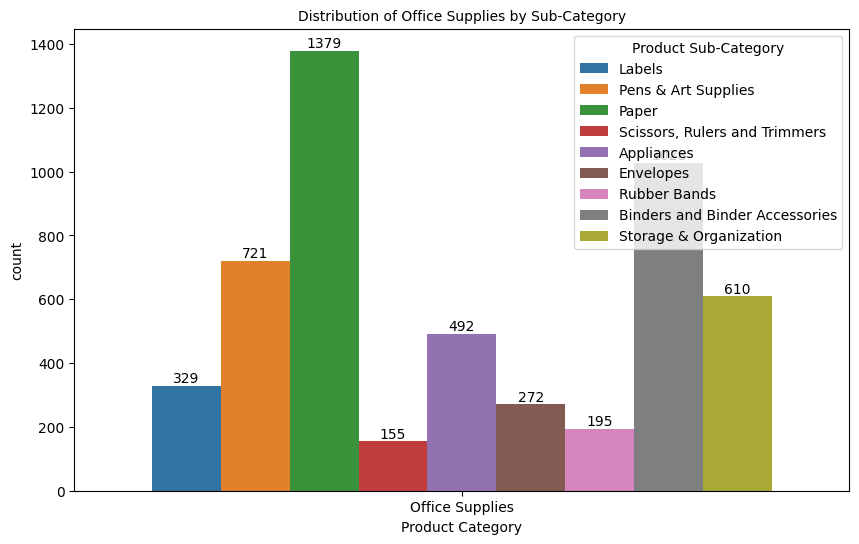

In [26]:
# Plot the count of each "Product Sub-Category" within "Office Supplies" and add labels to the bars.

#Product Cateogory : Office Supplies

plt.figure(figsize = (10,6))
plt.title("Distribution of Office Supplies by Sub-Category", fontsize=10)
ax = sns.countplot(x = "Product Category", data=data[data["Product Category"] == "Office Supplies"], hue = "Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)

From above chart we can say "Paper" is the Top sub-Category within Office Supplies

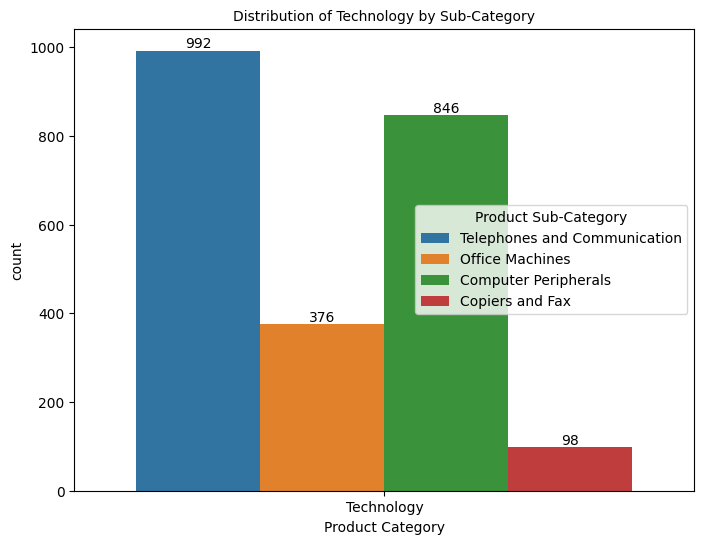

In [27]:
# Plot the count of each "Product Sub-Category" within "Technology" and add labels to the bars.

#Product Cateogory : Technology

plt.figure(figsize = (8,6))
plt.title("Distribution of Technology by Sub-Category", fontsize=10)
ax = sns.countplot(x = "Product Category", data=data[data["Product Category"] == "Technology"], hue = "Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)

From above chart we can say "Telephones and Communication" is the Top sub-Category within Technology

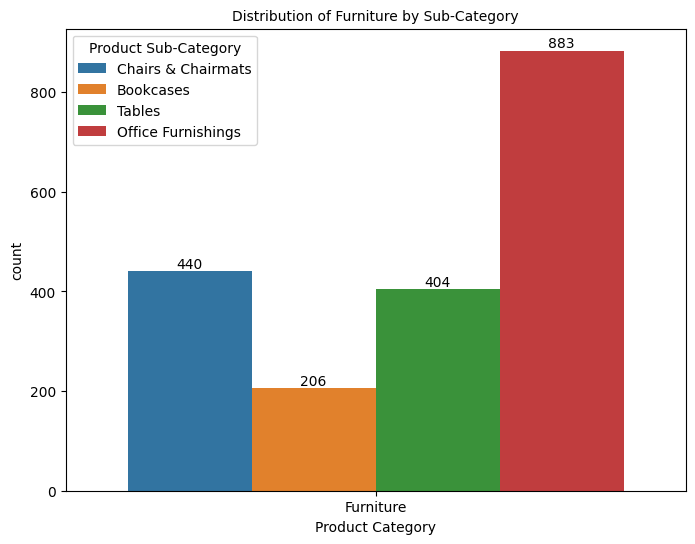

In [28]:
# Plot the count of each "Product Sub-Category" within "Furniture" and add labels to the bars.

#Product Cateogory : Furniture

plt.figure(figsize = (8,6))
plt.title("Distribution of Furniture by Sub-Category", fontsize=10)
ax= sns.countplot(x = "Product Category", data=data[data["Product Category"] == "Furniture"], hue = "Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)

From above chart we can say "Office Furnishings" is the Top sub-Category within Furniture

# Sales


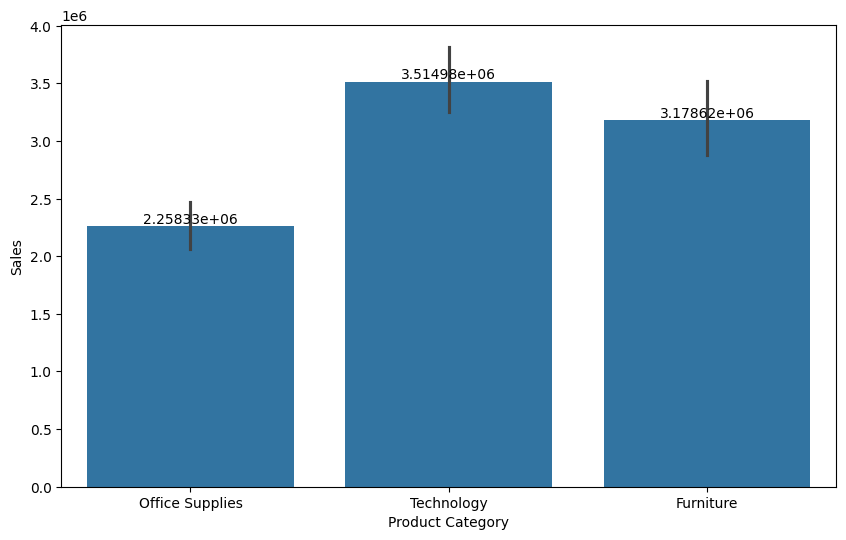

In [29]:
plt.figure(figsize=(10,6))
ax= sns.barplot( x = "Product Category" , y = "Sales" , data = data, estimator="sum")
for bars in ax.containers:
    ax.bar_label(bars)

From above chart we can say that High sales are comes from "Technology" product Category

In [30]:
Top_10_Cat= data["Product Sub-Category"].value_counts().head(10)

In [31]:
Top_10_Cat

Product Sub-Category
Paper                             1379
Binders and Binder Accessories    1028
Telephones and Communication       992
Office Furnishings                 883
Computer Peripherals               846
Pens & Art Supplies                721
Storage & Organization             610
Appliances                         492
Chairs & Chairmats                 440
Tables                             404
Name: count, dtype: int64

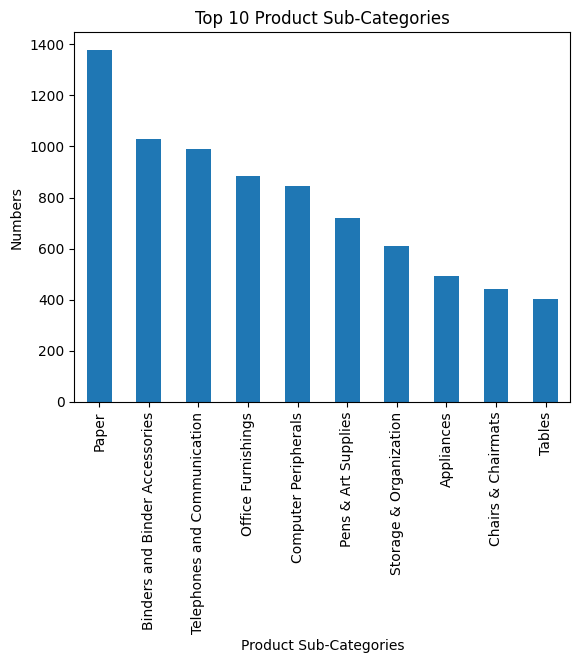

In [32]:
Top_10_Cat.plot(kind="bar")
plt.title("Top 10 Product Sub-Categories")
plt.xlabel("Product Sub-Categories")
plt.ylabel("Numbers")
plt.xticks(rotation=90)
plt.show()

From above chart we can say that paper is the Top selling product

# Customer Segment


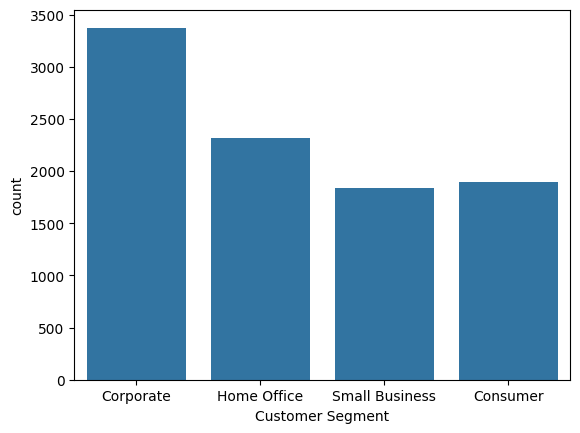

In [33]:
sns.countplot(x = "Customer Segment", data = data)
plt.show()

From above chart we can say that Top customer segment is "Corporate"

# Order Date

In [34]:
#dataset nature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [35]:
# Extracting Years from Orderdate

data["Order year"]= data["Order Date"].dt.year

In [36]:
data.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Order year'],
      dtype='object')

In [37]:
data["Order year"].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

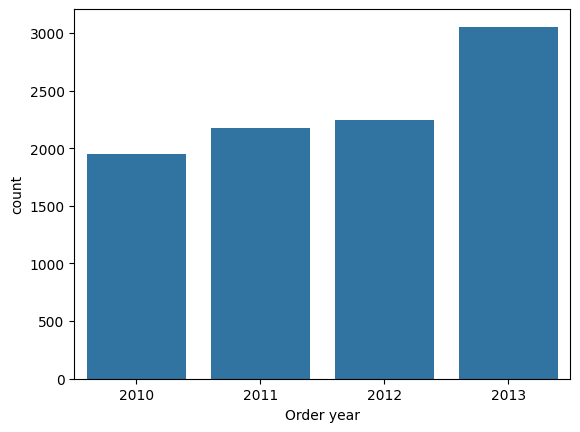

In [38]:
sns.countplot(x = "Order year", data = data)
plt.show()

From above chart we can say that company is growing years on year

# State or Province

In [39]:
# Get the top 10 most frequent values for "State or Province"
top_10_states = data["State or Province"].value_counts().head(10).index
top_10_states


Index(['California', 'Texas', 'Illinois', 'New York', 'Florida', 'Ohio',
       'Washington', 'Michigan', 'Pennsylvania', 'North Carolina'],
      dtype='object', name='State or Province')

C:\Users\lavis\AppData\Local\Temp\ipykernel_10900\3829477314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State or Province", data=filtered_data, palette = "Set2")


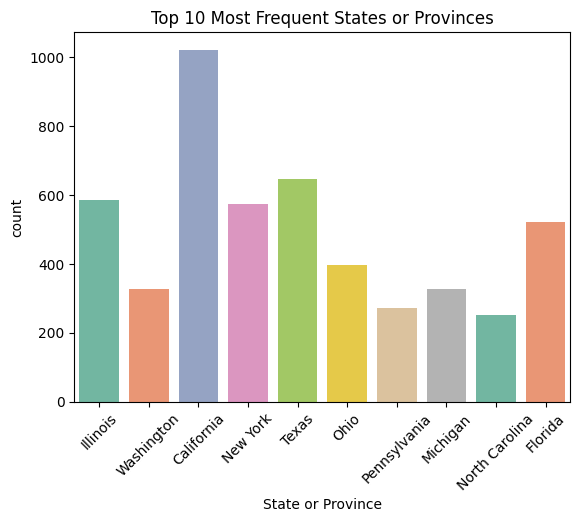

In [40]:
# Filter the data to include only the top 10 values
filtered_data = data[data["State or Province"].isin(top_10_states)]

# Plot the countplot for the top 10 states
sns.countplot(x="State or Province", data=filtered_data, palette = "Set2")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Top 10 Most Frequent States or Provinces")
plt.show()


# City

In [41]:
City = data["City"].value_counts().head(10)
City

City
New York City    202
Los Angeles      196
Seattle           93
Chicago           90
Boston            80
Washington        68
Philadelphia      58
Miami             50
Charlotte         47
Houston           46
Name: count, dtype: int64

In [42]:
sales_count = data.groupby(["City"], as_index = False) ["Sales"].sum().sort_values("Sales", ascending = False)

In [43]:
sales_count.head(10)

,City,Sales
850,New York City,534597.10
704,Los Angeles,515300.42
1160,Seattle,307983.67
205,Chicago,229744.82
1327,Washington,218868.62
771,Miami,190204.83
989,Philadelphia,158441.31
117,Boston,132614.65
301,Detroit,120055.20
562,Houston,114066.98


C:\Users\lavis\AppData\Local\Temp\ipykernel_10900\1538823283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "City", y = "Sales", data= sales_count.head(10), palette = "dark")


<Axes: title={'center': 'Top 10 Higest sales city'}, xlabel='City', ylabel='Sales'>

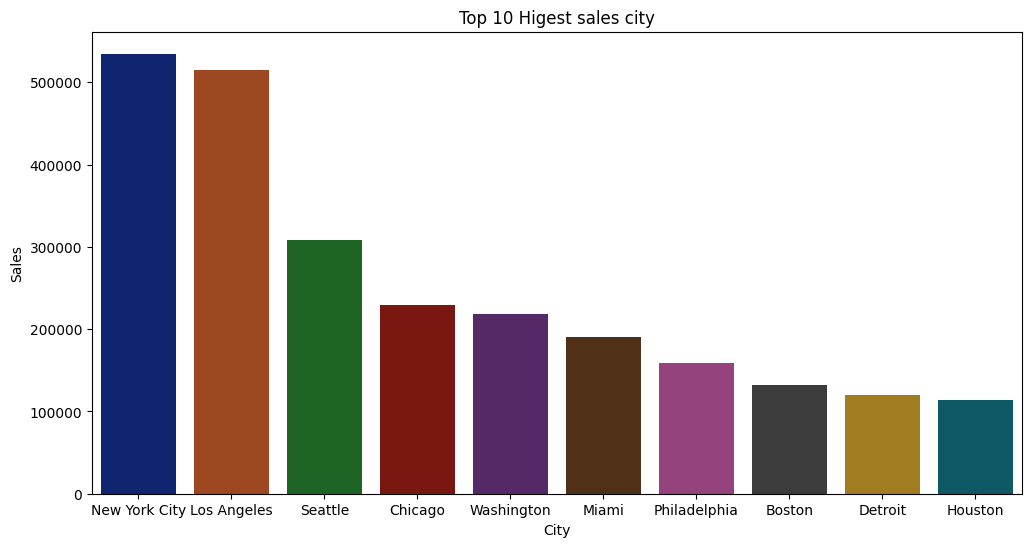

In [44]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Higest sales city")
sns.barplot(x = "City", y = "Sales", data= sales_count.head(10), palette = "dark")

From above chart we can say that Highest selling are comes from New York city